In [ ]:
'''
Em caso de dúvidas ou problemas, solicitamos, por gentileza, entrar em contato pelo e-mail:
python.economia@gmail.com


Problema Sugerido
Considere os dados populacionais de altura da população adulta de uma determinada cidade que constam no "Arquivo 30.xlsx".
Vimos em aula que a distribuição da média amostral para amostras de tamanho 35 pode ser aproximada por uma distribuição normal. 
Abaixo, temos o gráfico da distribuição da média amostral para amostras de tamanho 35.
'''

![Distribuicao%20amostral%20%28exemplo%20da%20aula%29%20(2).png](attachment:Distribuicao%20amostral%20%28exemplo%20da%20aula%29%20(2).png)
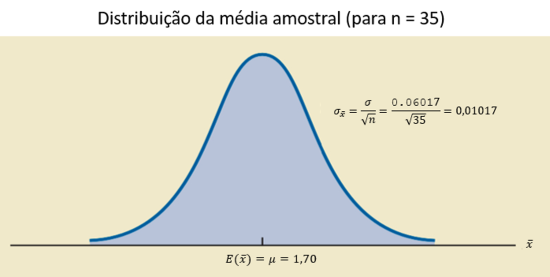

In [ ]:
'''
Estamos interessados no experimento que consiste em selecionar uma amostra aleatória de tamanho 35.

a) Qual é a probabilidade de que a altura média das 35 pessoas a serem selecionadas seja superior a 1.71 metro?
b) Qual é a probabilidade de que a altura média das 35 pessoas a serem selecionadas seja inferior a 1.69 metro?
c) Qual é a probabilidade de que a altura média das 35 pessoas a serem selecionadas esteja entre 1.69 e 1.71 metro?
d) Considere que o experimento consiste em selecionar uma amostra aleatória de tamanho 10.
   Seria possível realizar o cálculo de probabilidades pela área abaixo da curva como nos itens anteriores?
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
dados_populacionais = pd.read_excel('Arquivo 30.xlsx')

In [3]:
dados_populacionais.head()

,altura_metros
0,1.74
1,1.77
2,1.76
3,1.67
4,1.71


In [4]:
# Cria a variável n e atribui à ela o tamanho da amostra que vamos utilizar neste exercício
n = 35

In [5]:
# Valor esperado da média amostral  --> a média amostral é um estimador não viesado da média populacional
E_media_amostral = dados_populacionais.mean()
E_media_amostral

altura_metros    1.700076
dtype: float64

In [6]:
# Erro padrão de x_barra (Veja fórmula no gráfico no início)
sigma_x_barra = dados_populacionais.std(ddof=0) / np.sqrt(n)
sigma_x_barra

altura_metros    0.01017
dtype: float64

#### a) Qual é a probabilidade de que a altura média das 35 pessoas a serem selecionadas seja superior a 1.71 metro?

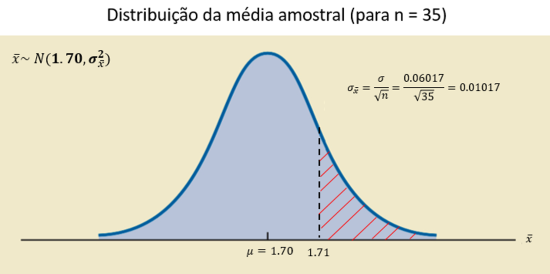

In [7]:
scipy.stats.norm.sf(x=1.71, loc=E_media_amostral, scale=sigma_x_barra)    # Area acima de 1.71

array([0.16458674])

In [ ]:
# A probabilidade de que a altura média das 35 pessoas a serem selecionadas seja superior a 1.71 metros é de 16,46%

#### b) Qual é a probabilidade de que a altura média das 35 pessoas a serem selecionadas seja inferior a 1.69 metro?

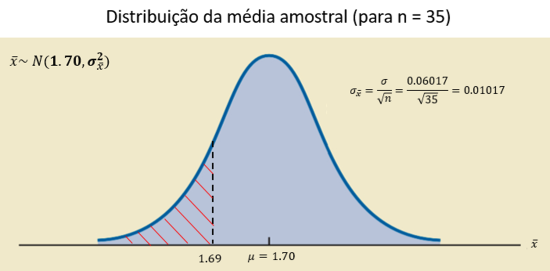

In [8]:
scipy.stats.norm.cdf(x=1.69, loc=E_media_amostral, scale=sigma_x_barra)   # Area abaixo de 1.69

array([0.16091774])

In [ ]:
# A probabilidade de que a altura média das 35 pessoas a serem selecionadas seja inferior a 1.69 metros é de 16,09%

#### c) Qual é a probabilidade de que a altura média das 35 pessoas a serem selecionadas esteja entre 1.69 e 1.71 metro?

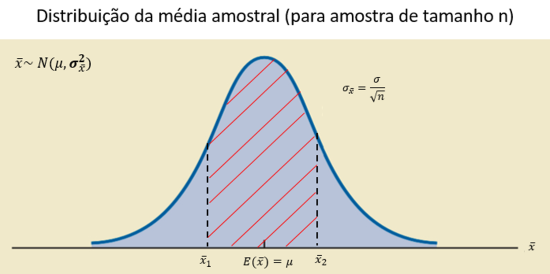

In [9]:
# Vamos definir uma função para calcular a área destacada no gráfico acima
# Depois a utilizaremos para calcular a área entre 1.69 e 1.71 como solicitado no item 

def area_central(dados_pop, tamanho_amostra, x_barra_1, x_barra_2):
    '''
    -> Calcula a área no interval [x_barra_1, x_barra_2] para uma distribuição da média amostral que segue uma normal
    -> x2 deve ser maior do que x1
    -> n é o tamanho da amostra para a qual a distribuição da média amostral é construída
    -> dados_pop: Series do pandas contendo os dados populacionais
    '''
    if x_barra_1 < x_barra_2: 
        E_media_amostral = dados_pop.mean()
        σ = dados_pop.std(ddof=0)
        sigma_x_barra = σ / np.sqrt(n)
        area_2 = scipy.stats.norm.cdf(x=x_barra_2, loc=E_media_amostral, scale=sigma_x_barra)
        area_1 = scipy.stats.norm.cdf(x=x_barra_1, loc=E_media_amostral, scale=sigma_x_barra)   
        area = area_2 - area_1
        return area
    else:
        return print("x_barra_2 deve ser maior do que x_barra_1")

In [ ]:
'''
Notas sobre a função acima:
σ: é o desvio padrão dos dados populacionais da altura dos adultos da cidade (constantes no "Arquivo 30.xls")
sigma_x_barra: é o desvio padrão da distribuição da média amostral (também chamado de erro padrão)
area_2: área abaixo da curva até  x_barra_2
area_1: área abaixo da curva até  x_barra_1
area: area_2 - area_1  -> subtrai a area_1 da area_2, resultando na área entre a area_2 e a area_1 hachurada no gráfico
'''

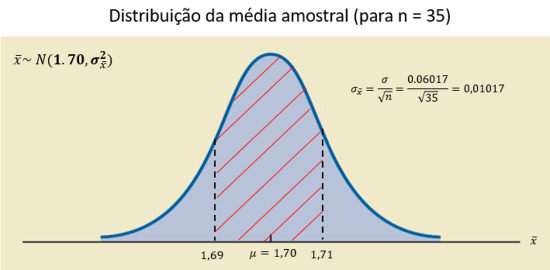

In [10]:
# calcula a probabilidade de que a altura média das 35 pessoas a serem selecionadas esteja entre 1.69 e 1.71 metro
area_central(dados_pop=dados_populacionais['altura_metros'], tamanho_amostra=n, x_barra_1=1.69, x_barra_2=1.71)

0.674495522254763

#### d) Considere que o experimento consiste em selecionar uma amostra aleatória de tamanho 10.
#### Seria possível realizar o cálculo de probabilidades pela área abaixo da curva como nos itens anteriores?

In [ ]:
'''
Só poderemos realizar os cálculos como nos itens anteriores se os dados populacionais (dados do "Arquivo 30.xls") tiverem 
distribuição normal.
Para dados populacionais que seguem uma distribuição normal, a distribuição da média amostral segue uma normal para qualquer 
tamanho de amostra.
Para amostras menores do que 30, se os dados populacionais não tiverem uma distribuição normal, não poderemos conhecer a 
"forma" da distribuição amostral (se segue uma normal ou qualquer outra distribuição de probabilidade). Assim, para uma amostra 
de tamanho 10, se não sabemos a distribuição dos dados populacionais, não podemos calcular áreas abaixo da curva.
'''